# Customer Segmentation with K-Means

Market segmentation is the activity of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers based on some type of shared characteristics.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

Malls or shopping complexes are often indulged in the race to increase their customers and hence making huge profits. To achieve this task machine learning is being applied by many stores already. It is amazing to realize the fact that how machine learning can aid in such ambitions. The shopping complexes make use of their customers’ data and develop ML models to target the right ones. This not only increases sales but also makes the complexes efficient.

In [37]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.figure_factory as ff
%matplotlib inline

In [38]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- CustomerID: It is the unique ID given to a customer
- Gender: Gender of the customer
- Age: The age of the customer
- Annual Income(k$): It is the annual income of the customer
- Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [63]:
print('Mean of Annual Income(k$) of Male:', round(df[df['Gender'] == 'Male'].iloc[:,3].mean(),2))
print('Mean of Annual Income(k$) of Female:', round(df[df['Gender'] == 'Female'].iloc[:,3].mean(),2))

Mean of Annual Income(k$) of Male: 62.23
Mean of Annual Income(k$) of Female: 59.25


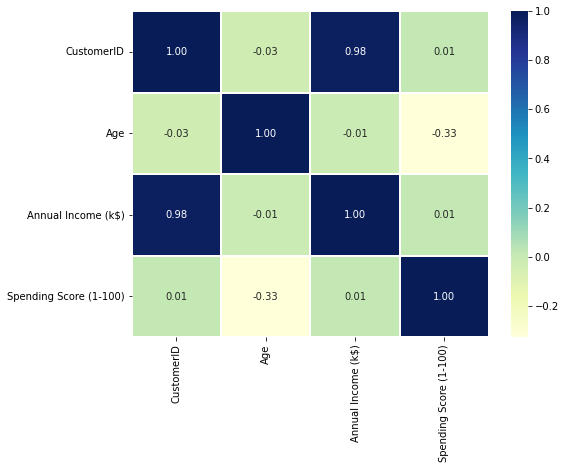

In [84]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)
plt.show()

In [85]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


**Visualization**

In [157]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

col = 'Gender'
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col: 'count','index': col})

#plot
colors = ['darkblue','cyan']
trace = go.Pie(labels=grouped[col],values=grouped['count'],pull=[0.03,0],marker=dict(colors=colors,line=dict(color='rgb(3,4,94)',width=1)))
layout = {'title':'Gender(Male, Female)'}
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

It looks more than 50% females in the dataset. We can say that females visits malls more than male.

In [122]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\anaconda\envs\test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\anaconda\envs\test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\anaconda\envs\test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



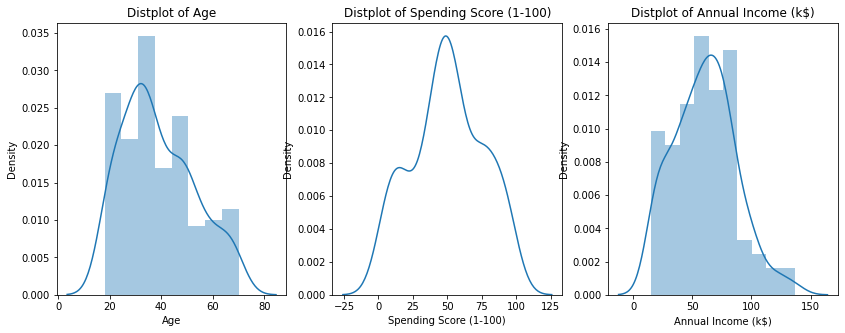

In [128]:
%matplotlib inline
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.distplot(df['Age'])
plt.title('Distplot of Age')

plt.subplot(1,3,2)
sns.distplot(df['Spending Score (1-100)'],hist=False)
plt.title('Distplot of Spending Score (1-100)')

plt.subplot(1,3,3)
sns.distplot(df['Annual Income (k$)'])
plt.title('Distplot of Annual Income (k$)')
plt.show()

In [164]:
x = df
col = 'Age'
v1 = x[col].value_counts().reset_index()
v1 = v1.rename(columns={col:'count','index':col})
v1['percent'] = v1['count'].apply(lambda x: 100*x/sum(v1['count']))
v1 = v1.sort_values(col)
trace1 = go.Bar(x=v1[col],y=v1['count'],name='0',marker=dict(color='rgb(3,4,94)'))
layout = {'title':'Age count','xaxis':{'title':'Age'},'yaxis':{'title':'Count'}}
fig = go.Figure(data=[trace1],layout=layout)
fig.layout.template = 'presentation'
iplot(fig)

It can be seen that the ages between 27 and 39 are very much frequent but there is no clear pattern. We can only find some group wise patterns such as the older age groups are lesser frequent in comparison. Interesting fact, there are equal no. of visitors in the mall for the age 18 and 67. People of age 55, 56, 69, 64 are very less frequent in the malls. People at age 32 are the most frequent visitors in malls.

In [175]:
d1=x[x['Gender']=='Male']
d2=x[x['Gender']=='Female']

col = 'Age'
v1 = d1[col].value_counts().reset_index()
v1 = v1.rename(columns={col:'count','index':col})
v1['percent'] = v1['count'].apply(lambda x: 100*x/sum(v1['count']))
v1 = v1.sort_values(col)

v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

trace1 = go.Scatter(x=v1[col],y=v1['count'],name='Male')
trace2 = go.Scatter(x=v2[col],y=v2['count'],name='Female')
layout = {'title':'Age Count (Male vs Female)','xaxis':{'title':'Age'},'yaxis':{'title':'Count'}}
fig = go.Figure(data=[trace1,trace2],layout=layout)
fig.layout.template='presentation'
iplot(fig)

Here we see that between the age of 23 and 50 females visits mall frequently and after the age of 50 males visit mall frequently. In the above plot overall we see that females visit the mall more than males.

In [176]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [194]:
col = 'Spending Score (1-100)'
v2 = x[col].value_counts().reset_index()
v2 = v2.rename(columns = {'index':col,col:'count'})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2 = v2.sort_values(col)
trace1 = go.Bar(x=v2[col],y=v2['count'],name='Emb')
layout = {'title':'Spending Score (1-100)','xaxis':{'title':'Spending Score'},'yaxis':{'title':'Count'}}
fig = go.Figure(data=[trace1],layout=layout)
fig.layout.template = 'presentation'
iplot(fig)

Most of the spending score skewed between 40 to 60. There are total of 8 people who have spending score 42 and 7 people have 55.

In [196]:
col='Spending Score (1-100)'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Male", marker=dict(color="#d62728"),text= df['Age'])
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Female", marker=dict(color='rgb(63, 72, 204)'),text= df['Age'])
y = [trace1, trace2]
layout={'title':"Spending score(Male vs Female) with their Age",'xaxis':{'title':"spending acore"}}
fig = go.Figure(data=y, layout=layout)
fig.layout.template='plotly_dark'
iplot(fig)

The spending score of most of the females lies between the 35 and 52 and also there is age between 18 to 35 years age. In the given dataset the no. of data of female is more than male so we did not exactly find the status of man visiting mall. By viewing these plots we conclude that male did not have much spending score than female because they did not visit mall frequently.

In [200]:
col='Annual Income (k$)'
v2=x[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="Emb",  marker=dict(color="#6ad49b"))
layout={'title':"Annual Income in k$",'xaxis':{'title':"Anual income"},'yaxis':{'title':"Count"}}
fig = go.Figure(data=[trace1], layout=layout)
fig.layout.template='presentation'
iplot(fig)

There are total 12 people who have the anual income 54 and 78k in dollar,very few people have the income ober 100k$, the highest anual income is 137k n dollar and both of them are male.

In [202]:
d1=x[x['Gender']=='Male']
d2=x[x['Gender']=='Female']
col='Spending Score (1-100)'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Male", marker=dict(color="#17becf"),text= df['Annual Income (k$)'])
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Female", marker=dict(color='#bcbd22'),text= df['Annual Income (k$)'])
y = [trace1, trace2]
layout={'title':"Spending score (Male vs Female)  with their Anual income in k$",'xaxis':{'title':"spending acore"}}
fig = go.Figure(data=y, layout=layout)
fig.layout.template='plotly_dark'
iplot(fig)

The spending score of male and female with their spending score such as the highest peak that there are 7 female who have the spending score is 42 and anual income is 25k$.

In [208]:
col='Annual Income (k$)'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Male", marker=dict(color="#17becf"),text= df['Spending Score (1-100)'])
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Female", marker=dict(color='#d62728'),text= df['Spending Score (1-100)'])
y = [trace1, trace2]
layout={'title':"Anual Income(Male vs Female) with Spending score ",'xaxis':{'title':"Anual income"}}
fig = go.Figure(data=y, layout=layout)
fig.layout.template='presentation'
iplot(fig)

In [210]:
col='Annual Income (k$)'
col1='Spending Score (1-100)'
v1=x[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=x[col1].value_counts().reset_index()
v2=v2.rename(columns={col1:'count1','index':col1})
v2['percent1']=v2['count1'].apply(lambda x : 100*x/sum(v2['count1']))
v2=v2.sort_values(col1)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Anual income", marker=dict(color="#6ad49b"))
trace2 = go.Scatter(x=v2[col1], y=v2["count1"], name="spending score", marker=dict(color='rgb(63, 72, 204)'))
y = [trace1, trace2]
layout={'title':"Anual Income Spending score (Male vs Female)",'xaxis':{'title':"Spending score // Anual income "}}
fig = go.Figure(data=y, layout=layout)
fig.layout.template='presentation'
iplot(fig)


# Dendogram Plot

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters. The dendrogram below shows the hierarchical clustering of six observations shown to on the scatterplot to the left. (Dendrogram is often miswritten as dendogram.)

**Hierarchical clustering** is where you build a cluster tree (a dendrogram) to represent data, where each group (or “node”) links to two or more successor groups. The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme. Each node in the cluster tree contains a group of similar data; Nodes group on the graph next to other, similar nodes. Clusters at one level join with clusters in the next level up, using a degree of similarity; The process carries on until all nodes are in the tree, which gives a visual snapshot of the data contained in the whole set. The total number of clusters is not predetermined before you start the tree creation.

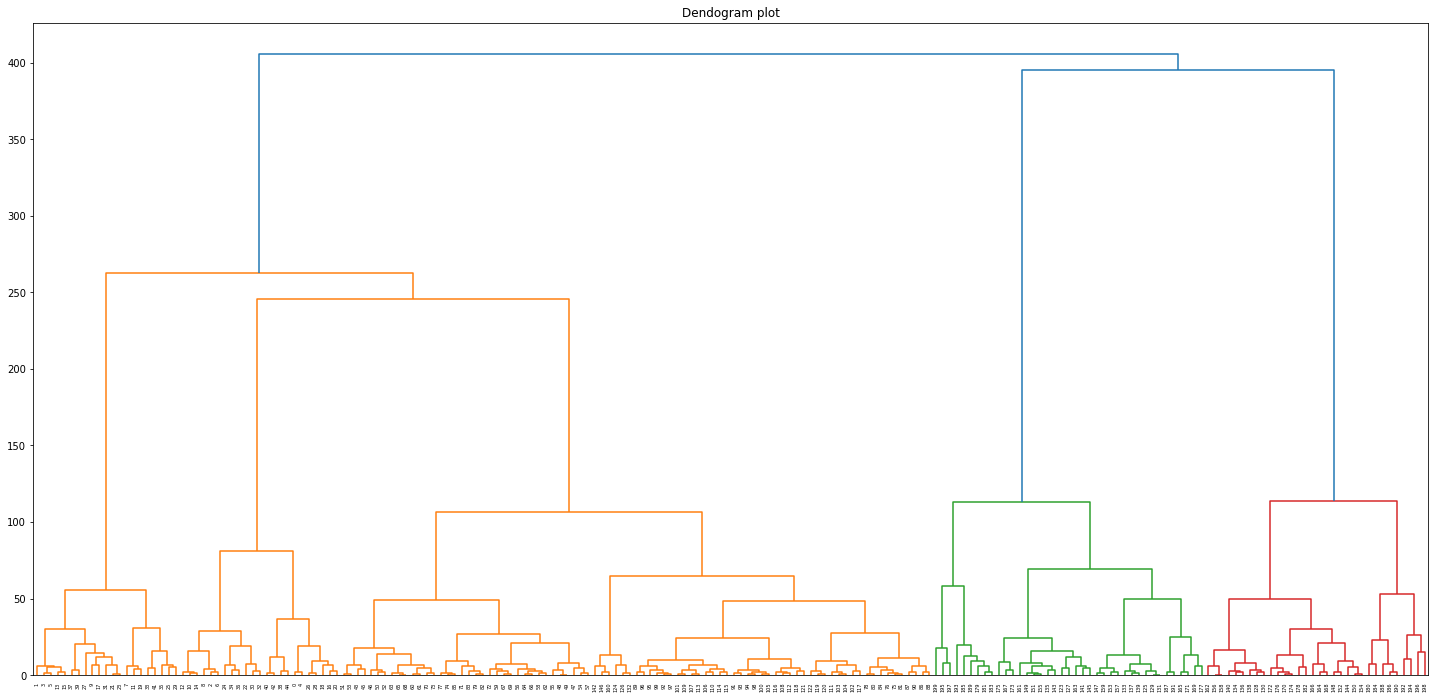

In [217]:
%matplotlib inline
import scipy.cluster.hierarchy as sch
X = df.iloc[:,[3,4]].values
plt.figure(figsize=(25,12))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram plot')
plt.show()

# K-Means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

- The centroids of the K clusters, which can be used to label new data
- Labels for the training data (each data point is assigned to a single cluster)

To implement K-Means clustering, we need to look at the Elbow Method.
- The Elbow method is a method of interpretation and validation of consistency within-cluster analysis designed to help to find the appropriate number of clusters in a dataset. The following figure demonstrates the elbow method :

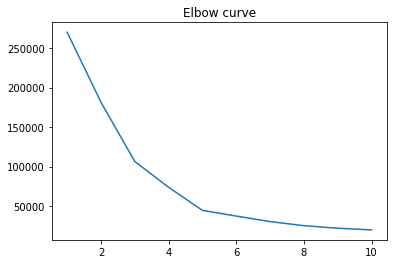

In [221]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curve')
plt.show()

It is clear from the figure that we should take the number of clusters equal to 5, as the slope of the curve is not steep enough after it.

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

**How the K-means algorithm works**

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

1. The centroids have stabilized — there is no change in their values because the clustering has been successful.
2. The defined number of iterations has been achieved.


In [231]:
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=5)
y_kmeans = kmeans.fit_predict(X)

In [235]:
X[y_kmeans == 0,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39], dtype=int64)

array([25.72727273, 55.2962963 , 86.53846154, 26.30434783, 88.2       ])

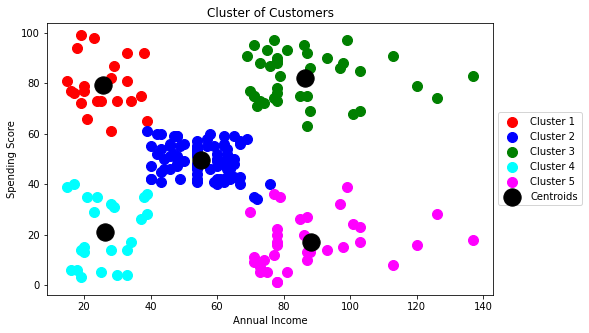

In [253]:
#Visualizing all the clusters

plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=100,c='magenta',label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300,c='black',label='Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Analyzing the Results**

- We can see that the mall customers can be broadly grouped into 5 groups based on their purchases made in the mall. In cluster 1(red colored) we can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.
- In cluster 2(blue colored) we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.
- In cluster 4(cyan colored) we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.
- In cluster 5(pink-colored) we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.
- In cluster 3(green colored) we see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

**Advantages**

1) Fast, robust and easier to understand.

2) Relatively efficient: O(tknd), where n is # objects, k is # clusters, d is # dimension of each object, and t is # iterations. Normally, k, t, d << n.

3) Gives best result when data set are distinct or well separated from each other.

**Benefits of customer segmentation**

- By enabling companies to target specific groups of customers, a customer segmentation model allows for the effective allocation of marketing resources and the maximization of cross- and up-selling opportunities.
- When a group of customers is sent personalized messages as part of a marketing mix that is designed around their needs, it's easier for companies to send those customers special offers meant to encourage them to buy more products. Customer segmentation can also improve customer service and assist in customer loyalty and retention.
- As a by-product of its personalized nature, marketing materials sent out using customer segmentation tend to be more valued and appreciated by the customer who receives them as opposed to impersonal brand messaging that doesn't acknowledge purchase history or any kind of customer relationship.
- Other benefits of customer segmentation include staying a step ahead of competitors in specific sections of the market and identifying new products that existing or potential customers could be interested in or improving products to meet customer expectations.